### 1 MVP

The data in “songs.csv” contains descriptive information on various songs from Spotify and one person’s personal opinion of each song. We want you to build a model that can predict “target”; target is a 1 when they liked the song, and 0 when the did not like it.

You need to decide:

Which variables to use
Do you want to do any feature engineering?
How to explore and clean the data
Which model to use
Do you want to change any of the parameters of the mode?
How to measure the accuracy of the model
You will want to build several models and compare the accuracy between them. Try to get the best model possible, but be careful about over fitting.

For this lab, please use Python.

In [1]:
import pandas as pd

In [33]:
songs = pd.read_csv("data/songs.csv")

In [34]:
songs.shape

(2017, 17)

In [35]:
songs.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [36]:
songs.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [42]:
songs.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [37]:
songs["target"].unique()

array([1, 0])

In [38]:
#songs.isnull().sum()
songs.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [39]:
songs_dropped = songs.drop(["Unnamed: 0", "song_title", "artist"], axis = True)
songs_dropped.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [40]:
songs_dropped.shape

(2017, 14)

In [41]:
songs_dropped = pd.get_dummies(songs_dropped, drop_first = True)
songs_dropped.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
# define the target vector
y = songs_dropped["target"]
# give me everyting apart from the target vector
X = songs_dropped.drop(columns = "target")

In [46]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [47]:
# R-squared value by using the score method
model.score(X, y)

0.1317097558476329

In [48]:
# coefficient for the intercept by looking at the intercept_ attribute
model.intercept_

-0.3134811663617145

In [49]:
#  the rest of the coefficients using the coef_ attribute, order is the same as variables in the data
model.coef_

array([-3.25330821e-01,  4.15252874e-01,  5.62368267e-07,  9.02784359e-02,
        2.67636273e-01,  9.74640405e-04,  9.81548740e-02, -2.32971874e-02,
       -3.48074943e-02,  8.16479726e-01,  7.95346840e-04, -8.63244841e-03,
        1.64789906e-01])

In [50]:
pd.DataFrame(
  {
  "Variable" : X.columns.values,
  "Coefficient" : model.coef_
  }
)

,Variable,Coefficient
0,acousticness,-3.253308e-01
1,danceability,4.152529e-01
2,duration_ms,5.623683e-07
3,energy,9.027844e-02
4,instrumentalness,2.676363e-01
5,key,9.746404e-04
6,liveness,9.815487e-02
7,loudness,-2.329719e-02
8,mode,-3.480749e-02
9,speechiness,8.164797e-01


speechiness, danceability and acousticness are strongly correlated with target. 
instrumentalness and valence also show some variation.

### Using Ordinary Least Squares (OLS) function

In [51]:
import statsmodels.api as sm
X_i = sm.add_constant(X)

X_i.head()

,const,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1.0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,1.0,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,1.0,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,1.0,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,1.0,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [52]:
sm_model = sm.OLS(y, X_i).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.37
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           6.29e-53
Time:                        22:59:08   Log-Likelihood:                -1321.4
No. Observations:                2017   AIC:                             2671.
Df Residuals:                    2003   BIC:                             2749.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3135      0.206  

 Create residual vs fitted plot:

Text(0, 0.5, 'Residual')

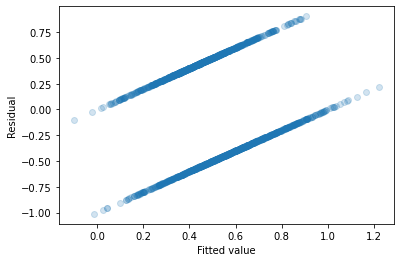

In [57]:
residuals = sm_model.fittedvalues - y

import matplotlib.pyplot as plt
plt.scatter(x = sm_model.fittedvalues, y = residuals, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual")

Create a normal-QQ plot

((array([-3.39464078, -3.14374321, -3.00458783, ...,  3.00458783,
          3.14374321,  3.39464078]),
  array([-1.01274299, -0.97399549, -0.95644326, ...,  0.88012768,
          0.882079  ,  0.90408759])),
 (0.4439165769129842, -1.5323016820479708e-11, 0.9514286517056173))

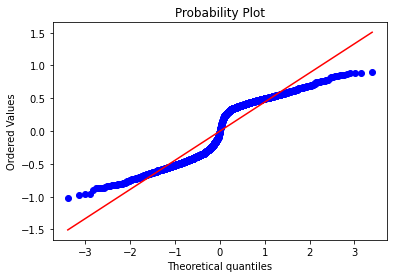

In [54]:
import scipy as sp
sp.stats.probplot(residuals, dist = "norm", plot = plt, fit = True)